<a href="https://www.kaggle.com/code/nickrod068/ai4all-final-project-group-19?scriptVersionId=125678011" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superheroes-nlp-dataset/superheroes_nlp_dataset.csv


In [2]:
# Read file
data = pd.read_csv('/kaggle/input/superheroes-nlp-dataset/superheroes_nlp_dataset.csv')

# Display data (looking for categories)
print(data.head(10))


                name               real_name               full_name  \
0            3-D Man     Delroy Garrett, Jr.     Delroy Garrett, Jr.   
1      514A (Gotham)             Bruce Wayne                     NaN   
2             A-Bomb  Richard Milhouse Jones  Richard Milhouse Jones   
3                 Aa                      Aa                     NaN   
4         Aaron Cash              Aaron Cash              Aaron Cash   
5       Aayla Secura            Aayla Secura                     NaN   
6         Abe Sapien          Abraham Sapien          Abraham Sapien   
7           Abin Sur                     NaN                     NaN   
8        Abomination            Emil Blonsky            Emil Blonsky   
9  Abra Kadabra (CW)                 Unknown                 Unknown   

  overall_score                                       history_text  \
0             6  Delroy Garrett, Jr. grew up to become a track ...   
1            10  He was one of the many prisoners of Indian Hil... 

In [3]:
# Data cleaning
# Extract name for labeling
superhero_names = data['name']

# Extract relevant attributes
attributes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score']
data = data[attributes]

In [4]:
# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
# Implement k-means clustering
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [6]:
# Label superheroes based on cluster
data['cluster'] = kmeans.labels_

In [7]:
# Determining the most powerful superhero in each cluster
centroids = kmeans.cluster_centers_
strongest_superheroes = []

for i in range(k):
    cluster_data = data[data['cluster'] == i].copy()
    cluster_data.loc[:, 'total_score'] = cluster_data[attributes].sum(axis=1)
    strongest_superhero = cluster_data.loc[cluster_data['total_score'].idxmax()]
    strongest_superheroes.append(strongest_superhero)

strongest_superheroes = pd.DataFrame(strongest_superheroes)

In [8]:
# Assigning stored names to superheroes (w/o this step it just labels superhero as a number)
strongest_superheroes = pd.DataFrame(strongest_superheroes)
strongest_superheroes['name'] = superhero_names[strongest_superheroes.index]

In [9]:
# Determining which superhero is most likely to win in a fight
strongest_superheroes['total_score'] = strongest_superheroes[attributes].sum(axis=1)
winner = strongest_superheroes.loc[strongest_superheroes['total_score'].idxmax()]

In [10]:
# Console log most likely to win
print("The superhero most likely to win in a fight is: ", winner['name'])

The superhero most likely to win in a fight is:  Abraxas


In [11]:
# PCA implementation setup (Cluster is 4-dimensional reduced to 2-dimensional for data display)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

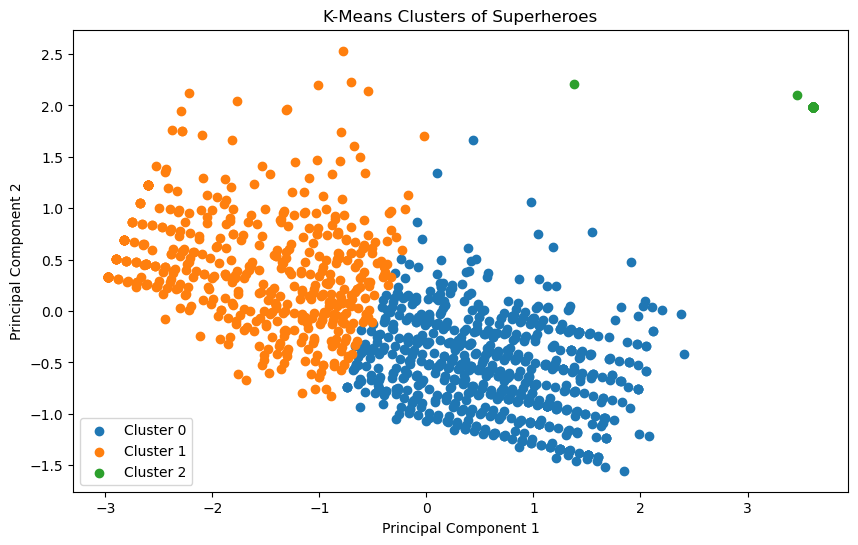

In [12]:
# Code for displaying K-means cluster 
plt.figure(figsize=(10, 6))

for i in range(k):
    cluster_data = data_pca[data['cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('K-Means Clusters of Superheroes')
plt.show()

In [13]:
# Breaking down PCA labels and trying to figure out data correlation to strongest superhero output

# Extract the principal components
principal_components = pca.components_

# Display the principal components
for i, component in enumerate(principal_components):
    print(f"Principal Component {i+1}:")
    for attribute, weight in zip(attributes, component):
        print(f"  {attribute}: {weight:.2f}")

Principal Component 1:
  intelligence_score: -0.38
  strength_score: -0.52
  speed_score: -0.53
  durability_score: -0.55
Principal Component 2:
  intelligence_score: -0.90
  strength_score: 0.40
  speed_score: 0.10
  durability_score: 0.14
